## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9603901	total: 58.4ms	remaining: 58.4s
1:	learn: 0.9426529	total: 59.2ms	remaining: 29.6s
2:	learn: 0.9230918	total: 60.1ms	remaining: 20s
3:	learn: 0.9060689	total: 61ms	remaining: 15.2s
4:	learn: 0.8889497	total: 61.8ms	remaining: 12.3s
5:	learn: 0.8737764	total: 62.6ms	remaining: 10.4s
6:	learn: 0.8584427	total: 63.7ms	remaining: 9.03s
7:	learn: 0.8433831	total: 64.4ms	remaining: 7.98s
8:	learn: 0.8300343	total: 65.6ms	remaining: 7.22s
9:	learn: 0.8126257	total: 66.7ms	remaining: 6.6s
10:	learn: 0.7982019	total: 67.8ms	remaining: 6.09s
11:	learn: 0.7834807	total: 68.9ms	remaining: 5.67s
12:	learn: 0.7685766	total: 70.2ms	remaining: 5.33s
13:	learn: 0.7539694	total: 71.4ms	remaining: 5.03s
14:	learn: 0.7421302	total: 72.6ms	remaining: 4.77s
15:	learn: 0.7292631	total: 73.5ms	remaining: 4.52s
16:	learn: 0.7174310	total: 74.4ms	remaining: 4.3s
17:	learn: 0.7068477	total: 75.4ms	remaining: 4.11s
18:	learn: 0.6953500	total: 76.2ms	remaining: 3.94

46:	learn: 0.4771483	total: 104ms	remaining: 2.11s
47:	learn: 0.4710802	total: 105ms	remaining: 2.08s
48:	learn: 0.4669224	total: 105ms	remaining: 2.05s
49:	learn: 0.4616505	total: 106ms	remaining: 2.02s
50:	learn: 0.4556795	total: 107ms	remaining: 1.99s
51:	learn: 0.4515282	total: 108ms	remaining: 1.97s
52:	learn: 0.4462163	total: 109ms	remaining: 1.94s
53:	learn: 0.4417223	total: 110ms	remaining: 1.92s
54:	learn: 0.4382518	total: 110ms	remaining: 1.9s
55:	learn: 0.4329268	total: 112ms	remaining: 1.88s
56:	learn: 0.4291741	total: 113ms	remaining: 1.87s
57:	learn: 0.4247941	total: 114ms	remaining: 1.85s
58:	learn: 0.4205016	total: 115ms	remaining: 1.83s
59:	learn: 0.4166236	total: 116ms	remaining: 1.82s
60:	learn: 0.4132556	total: 117ms	remaining: 1.8s
61:	learn: 0.4096146	total: 118ms	remaining: 1.78s
62:	learn: 0.4054147	total: 119ms	remaining: 1.77s
63:	learn: 0.4019788	total: 120ms	remaining: 1.75s
64:	learn: 0.3983840	total: 120ms	remaining: 1.73s
65:	learn: 0.3948946	total: 121ms

133:	learn: 0.2716298	total: 189ms	remaining: 1.22s
134:	learn: 0.2707397	total: 191ms	remaining: 1.23s
135:	learn: 0.2699352	total: 193ms	remaining: 1.22s
136:	learn: 0.2688976	total: 194ms	remaining: 1.22s
137:	learn: 0.2678798	total: 195ms	remaining: 1.22s
138:	learn: 0.2669975	total: 196ms	remaining: 1.22s
139:	learn: 0.2663761	total: 198ms	remaining: 1.21s
140:	learn: 0.2655629	total: 199ms	remaining: 1.21s
141:	learn: 0.2649459	total: 199ms	remaining: 1.2s
142:	learn: 0.2638278	total: 200ms	remaining: 1.2s
143:	learn: 0.2633764	total: 202ms	remaining: 1.2s
144:	learn: 0.2626698	total: 204ms	remaining: 1.21s
145:	learn: 0.2619477	total: 206ms	remaining: 1.21s
146:	learn: 0.2609629	total: 207ms	remaining: 1.2s
147:	learn: 0.2599545	total: 208ms	remaining: 1.2s
148:	learn: 0.2594750	total: 209ms	remaining: 1.2s
149:	learn: 0.2585196	total: 211ms	remaining: 1.2s
150:	learn: 0.2574053	total: 213ms	remaining: 1.2s
151:	learn: 0.2566002	total: 215ms	remaining: 1.2s
152:	learn: 0.2560025

214:	learn: 0.2217548	total: 273ms	remaining: 996ms
215:	learn: 0.2209039	total: 274ms	remaining: 995ms
216:	learn: 0.2204475	total: 275ms	remaining: 992ms
217:	learn: 0.2199937	total: 276ms	remaining: 989ms
218:	learn: 0.2195681	total: 276ms	remaining: 986ms
219:	learn: 0.2189701	total: 277ms	remaining: 982ms
220:	learn: 0.2183548	total: 278ms	remaining: 980ms
221:	learn: 0.2179600	total: 279ms	remaining: 978ms
222:	learn: 0.2176562	total: 280ms	remaining: 975ms
223:	learn: 0.2174177	total: 281ms	remaining: 972ms
224:	learn: 0.2169998	total: 282ms	remaining: 971ms
225:	learn: 0.2168463	total: 283ms	remaining: 969ms
226:	learn: 0.2164631	total: 284ms	remaining: 967ms
227:	learn: 0.2157808	total: 285ms	remaining: 964ms
228:	learn: 0.2153285	total: 286ms	remaining: 961ms
229:	learn: 0.2148570	total: 286ms	remaining: 959ms
230:	learn: 0.2147148	total: 287ms	remaining: 956ms
231:	learn: 0.2142769	total: 288ms	remaining: 954ms
232:	learn: 0.2140910	total: 289ms	remaining: 952ms
233:	learn: 

287:	learn: 0.1910993	total: 356ms	remaining: 881ms
288:	learn: 0.1903530	total: 361ms	remaining: 888ms
289:	learn: 0.1900778	total: 363ms	remaining: 890ms
290:	learn: 0.1896104	total: 365ms	remaining: 889ms
291:	learn: 0.1892371	total: 366ms	remaining: 887ms
292:	learn: 0.1886201	total: 373ms	remaining: 900ms
293:	learn: 0.1882389	total: 375ms	remaining: 902ms
294:	learn: 0.1878132	total: 377ms	remaining: 901ms
295:	learn: 0.1876470	total: 380ms	remaining: 904ms
296:	learn: 0.1873169	total: 386ms	remaining: 914ms
297:	learn: 0.1870276	total: 389ms	remaining: 917ms
298:	learn: 0.1865730	total: 392ms	remaining: 918ms
299:	learn: 0.1864026	total: 400ms	remaining: 933ms
300:	learn: 0.1859992	total: 403ms	remaining: 936ms
301:	learn: 0.1856874	total: 404ms	remaining: 934ms
302:	learn: 0.1854626	total: 405ms	remaining: 932ms
303:	learn: 0.1849626	total: 408ms	remaining: 935ms
304:	learn: 0.1846608	total: 410ms	remaining: 934ms
305:	learn: 0.1843791	total: 411ms	remaining: 932ms
306:	learn: 

325:	learn: 0.1773163	total: 452ms	remaining: 935ms
326:	learn: 0.1768993	total: 453ms	remaining: 932ms
327:	learn: 0.1766453	total: 454ms	remaining: 929ms
328:	learn: 0.1760908	total: 454ms	remaining: 927ms
329:	learn: 0.1759680	total: 455ms	remaining: 924ms
330:	learn: 0.1755657	total: 456ms	remaining: 922ms
331:	learn: 0.1751204	total: 458ms	remaining: 921ms
332:	learn: 0.1746592	total: 459ms	remaining: 920ms
333:	learn: 0.1742196	total: 460ms	remaining: 918ms
334:	learn: 0.1738105	total: 461ms	remaining: 916ms
335:	learn: 0.1734464	total: 462ms	remaining: 914ms
336:	learn: 0.1731629	total: 463ms	remaining: 912ms
337:	learn: 0.1726684	total: 464ms	remaining: 910ms
338:	learn: 0.1724264	total: 465ms	remaining: 907ms
339:	learn: 0.1718542	total: 466ms	remaining: 905ms
340:	learn: 0.1714893	total: 467ms	remaining: 903ms
341:	learn: 0.1710862	total: 468ms	remaining: 901ms
342:	learn: 0.1707820	total: 469ms	remaining: 899ms
343:	learn: 0.1705899	total: 471ms	remaining: 897ms
344:	learn: 

398:	learn: 0.1523712	total: 544ms	remaining: 820ms
399:	learn: 0.1519601	total: 548ms	remaining: 822ms
400:	learn: 0.1516811	total: 551ms	remaining: 822ms
401:	learn: 0.1513062	total: 554ms	remaining: 824ms
402:	learn: 0.1509695	total: 557ms	remaining: 825ms
403:	learn: 0.1507282	total: 559ms	remaining: 824ms
404:	learn: 0.1504569	total: 560ms	remaining: 823ms
405:	learn: 0.1501814	total: 561ms	remaining: 821ms
406:	learn: 0.1497139	total: 563ms	remaining: 820ms
407:	learn: 0.1493981	total: 564ms	remaining: 819ms
408:	learn: 0.1490416	total: 568ms	remaining: 820ms
409:	learn: 0.1485958	total: 569ms	remaining: 819ms
410:	learn: 0.1482675	total: 570ms	remaining: 817ms
411:	learn: 0.1479839	total: 572ms	remaining: 816ms
412:	learn: 0.1478198	total: 574ms	remaining: 816ms
413:	learn: 0.1475658	total: 576ms	remaining: 815ms
414:	learn: 0.1474561	total: 577ms	remaining: 813ms
415:	learn: 0.1471469	total: 578ms	remaining: 812ms
416:	learn: 0.1468782	total: 579ms	remaining: 810ms
417:	learn: 

446:	learn: 0.1388117	total: 642ms	remaining: 794ms
447:	learn: 0.1384928	total: 645ms	remaining: 794ms
448:	learn: 0.1383507	total: 649ms	remaining: 797ms
449:	learn: 0.1380816	total: 661ms	remaining: 808ms
450:	learn: 0.1377268	total: 662ms	remaining: 806ms
451:	learn: 0.1373871	total: 663ms	remaining: 804ms
452:	learn: 0.1371135	total: 664ms	remaining: 802ms
453:	learn: 0.1369453	total: 665ms	remaining: 800ms
454:	learn: 0.1365865	total: 666ms	remaining: 797ms
455:	learn: 0.1362136	total: 667ms	remaining: 795ms
456:	learn: 0.1359082	total: 669ms	remaining: 795ms
457:	learn: 0.1354828	total: 671ms	remaining: 794ms
458:	learn: 0.1352134	total: 671ms	remaining: 791ms
459:	learn: 0.1349402	total: 672ms	remaining: 789ms
460:	learn: 0.1348076	total: 673ms	remaining: 787ms
461:	learn: 0.1344359	total: 674ms	remaining: 785ms
462:	learn: 0.1343158	total: 675ms	remaining: 783ms
463:	learn: 0.1339710	total: 676ms	remaining: 781ms
464:	learn: 0.1337236	total: 677ms	remaining: 779ms
465:	learn: 

532:	learn: 0.1178989	total: 729ms	remaining: 639ms
533:	learn: 0.1176035	total: 730ms	remaining: 637ms
534:	learn: 0.1174717	total: 731ms	remaining: 635ms
535:	learn: 0.1172058	total: 732ms	remaining: 634ms
536:	learn: 0.1169678	total: 733ms	remaining: 632ms
537:	learn: 0.1168882	total: 734ms	remaining: 630ms
538:	learn: 0.1167096	total: 735ms	remaining: 629ms
539:	learn: 0.1163818	total: 736ms	remaining: 627ms
540:	learn: 0.1162954	total: 737ms	remaining: 625ms
541:	learn: 0.1160469	total: 738ms	remaining: 624ms
542:	learn: 0.1158130	total: 739ms	remaining: 622ms
543:	learn: 0.1155814	total: 740ms	remaining: 620ms
544:	learn: 0.1153887	total: 741ms	remaining: 618ms
545:	learn: 0.1151922	total: 742ms	remaining: 617ms
546:	learn: 0.1150302	total: 742ms	remaining: 615ms
547:	learn: 0.1148232	total: 743ms	remaining: 613ms
548:	learn: 0.1146485	total: 744ms	remaining: 611ms
549:	learn: 0.1143652	total: 745ms	remaining: 609ms
550:	learn: 0.1140922	total: 746ms	remaining: 608ms
551:	learn: 

652:	learn: 0.0965803	total: 831ms	remaining: 441ms
653:	learn: 0.0965350	total: 832ms	remaining: 440ms
654:	learn: 0.0964991	total: 832ms	remaining: 438ms
655:	learn: 0.0964875	total: 833ms	remaining: 437ms
656:	learn: 0.0962288	total: 834ms	remaining: 435ms
657:	learn: 0.0960193	total: 835ms	remaining: 434ms
658:	learn: 0.0959587	total: 836ms	remaining: 433ms
659:	learn: 0.0957607	total: 837ms	remaining: 431ms
660:	learn: 0.0955574	total: 838ms	remaining: 430ms
661:	learn: 0.0955350	total: 839ms	remaining: 428ms
662:	learn: 0.0953689	total: 839ms	remaining: 427ms
663:	learn: 0.0952179	total: 840ms	remaining: 425ms
664:	learn: 0.0951991	total: 841ms	remaining: 424ms
665:	learn: 0.0951889	total: 842ms	remaining: 422ms
666:	learn: 0.0950141	total: 843ms	remaining: 421ms
667:	learn: 0.0948440	total: 843ms	remaining: 419ms
668:	learn: 0.0947052	total: 844ms	remaining: 418ms
669:	learn: 0.0944589	total: 845ms	remaining: 416ms
670:	learn: 0.0943380	total: 846ms	remaining: 415ms
671:	learn: 

753:	learn: 0.0839876	total: 919ms	remaining: 300ms
754:	learn: 0.0838703	total: 920ms	remaining: 298ms
755:	learn: 0.0838589	total: 920ms	remaining: 297ms
756:	learn: 0.0837399	total: 921ms	remaining: 296ms
757:	learn: 0.0835352	total: 922ms	remaining: 295ms
758:	learn: 0.0834473	total: 923ms	remaining: 293ms
759:	learn: 0.0833297	total: 924ms	remaining: 292ms
760:	learn: 0.0832952	total: 925ms	remaining: 290ms
761:	learn: 0.0832560	total: 926ms	remaining: 289ms
762:	learn: 0.0831465	total: 927ms	remaining: 288ms
763:	learn: 0.0829615	total: 927ms	remaining: 286ms
764:	learn: 0.0828969	total: 928ms	remaining: 285ms
765:	learn: 0.0827262	total: 929ms	remaining: 284ms
766:	learn: 0.0825991	total: 930ms	remaining: 282ms
767:	learn: 0.0824935	total: 931ms	remaining: 281ms
768:	learn: 0.0823142	total: 932ms	remaining: 280ms
769:	learn: 0.0822131	total: 933ms	remaining: 279ms
770:	learn: 0.0822007	total: 933ms	remaining: 277ms
771:	learn: 0.0820638	total: 934ms	remaining: 276ms
772:	learn: 

868:	learn: 0.0720952	total: 1.02s	remaining: 154ms
869:	learn: 0.0720012	total: 1.02s	remaining: 153ms
870:	learn: 0.0719788	total: 1.02s	remaining: 151ms
871:	learn: 0.0718415	total: 1.02s	remaining: 150ms
872:	learn: 0.0717262	total: 1.02s	remaining: 149ms
873:	learn: 0.0716403	total: 1.03s	remaining: 148ms
874:	learn: 0.0715263	total: 1.03s	remaining: 147ms
875:	learn: 0.0714744	total: 1.03s	remaining: 145ms
876:	learn: 0.0713401	total: 1.03s	remaining: 144ms
877:	learn: 0.0711906	total: 1.03s	remaining: 143ms
878:	learn: 0.0710150	total: 1.03s	remaining: 142ms
879:	learn: 0.0708832	total: 1.03s	remaining: 141ms
880:	learn: 0.0707801	total: 1.03s	remaining: 139ms
881:	learn: 0.0707706	total: 1.03s	remaining: 138ms
882:	learn: 0.0707606	total: 1.03s	remaining: 137ms
883:	learn: 0.0705636	total: 1.03s	remaining: 136ms
884:	learn: 0.0705130	total: 1.04s	remaining: 135ms
885:	learn: 0.0703910	total: 1.04s	remaining: 133ms
886:	learn: 0.0703779	total: 1.04s	remaining: 132ms
887:	learn: 

962:	learn: 0.0635439	total: 1.11s	remaining: 42.6ms
963:	learn: 0.0634165	total: 1.11s	remaining: 41.5ms
964:	learn: 0.0633400	total: 1.11s	remaining: 40.3ms
965:	learn: 0.0632483	total: 1.11s	remaining: 39.1ms
966:	learn: 0.0631624	total: 1.11s	remaining: 38ms
967:	learn: 0.0631406	total: 1.11s	remaining: 36.9ms
968:	learn: 0.0630594	total: 1.11s	remaining: 35.7ms
969:	learn: 0.0629857	total: 1.12s	remaining: 34.5ms
970:	learn: 0.0628768	total: 1.12s	remaining: 33.4ms
971:	learn: 0.0628527	total: 1.12s	remaining: 32.2ms
972:	learn: 0.0627826	total: 1.12s	remaining: 31.1ms
973:	learn: 0.0626785	total: 1.12s	remaining: 29.9ms
974:	learn: 0.0625759	total: 1.12s	remaining: 28.8ms
975:	learn: 0.0624357	total: 1.12s	remaining: 27.6ms
976:	learn: 0.0623594	total: 1.12s	remaining: 26.4ms
977:	learn: 0.0623275	total: 1.12s	remaining: 25.3ms
978:	learn: 0.0622677	total: 1.13s	remaining: 24.1ms
979:	learn: 0.0621714	total: 1.13s	remaining: 23ms
980:	learn: 0.0620889	total: 1.13s	remaining: 21.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

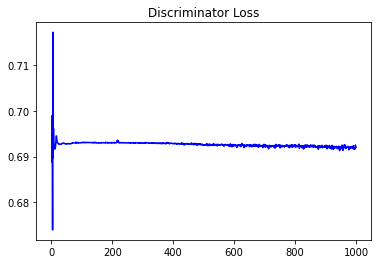

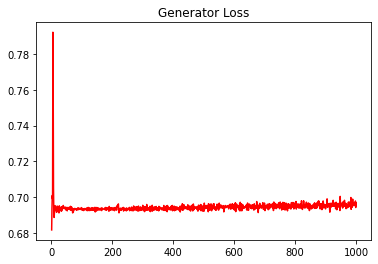

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12254424133766288


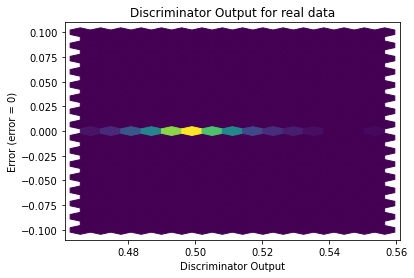

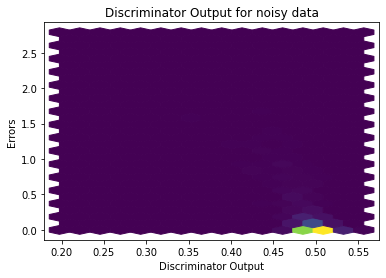

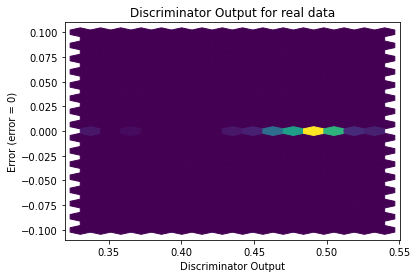

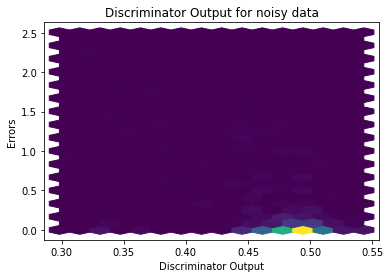

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


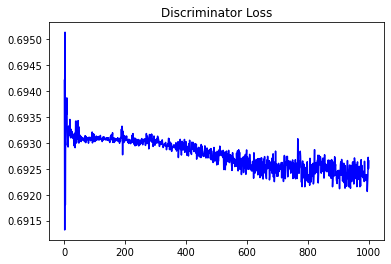

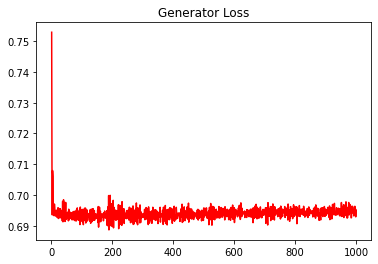

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12787823423181258


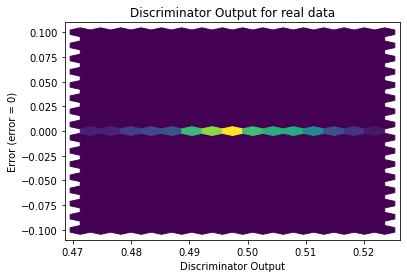

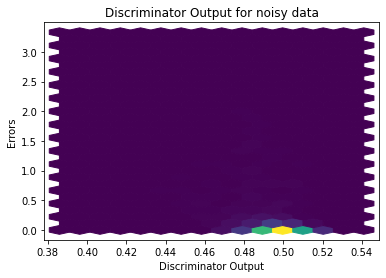

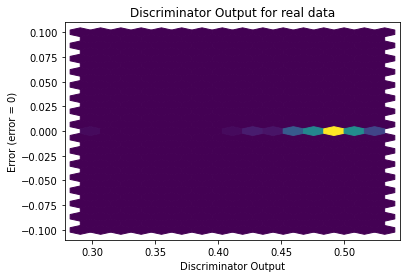

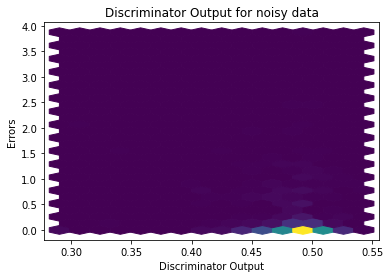

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3854]], requires_grad=True)
